In [77]:
import os

In [78]:
learning_path = '/home/proj01/MA/rev5/Learning'
validation_path = '/home/proj01/MA/rev5/Validation'

In [79]:
learning_list = os.listdir(learning_path)
validation_list = os.listdir(validation_path)

In [4]:
for folder in learning_list:
    if folder[0]!='.':
        file_list = os.listdir(os.path.join(learning_path,folder))
        for file in file_list:
            print(os.path.join(learning_path,folder,file))
    break

/home/proj01/MA/rev5/Learning/confidential assignment/definition3_gongjo_test_ut.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition2_gongjo_test_ut.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition3_gongjo_test_t.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition1_gongjo_scaling_untrust.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition2_gongjo_scaling_trust.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition2_gongjo_scaling_untrust.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition1_gongjo_test_t.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition3_gongjo_scaling_untrust.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition1_gongjo_test_ut.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition3_gongjo_scaling_trust.txt
/home/proj01/MA/rev5/Learning/confidential assignment/definition2_gongjo_test_t.txt
/home/proj01/MA/rev5/Learning/co

In [ ]:
for folder in learning_list:
    if folder[0]!='.':
        file_list = os.listdir(os.path.join(learning_path,folder))
        for file in file_list:
            with open(os.path.join(learning_path,folder,file),"r")as f:
                data = f.read()
            break
    break

# movie_title 수집

In [6]:
import json

movie_title = set()

#영화목록
for folder in validation_list:
    if folder[0]!='.':
        file_list = os.listdir(os.path.join(validation_path,folder))
        #file 목록
        for file in file_list:
            with open(os.path.join(validation_path,folder,file)) as f:
                data = json.load(f)
            for r in data['data']:
                movie_title.add(r['title'])

# movie info data

In [174]:
import pandas as pd

In [180]:
movie_title_genre = {}
bo_data_path = './movieinfo'
bo_data_list = os.listdir(bo_data_path)
bo_data_list = sorted(bo_data_list)
for bo in bo_data_list:
    if bo[-3:]=='xls':
        df = pd.read_excel(os.path.join(bo_data_path,bo))
        df.columns = df.loc[3]
        df = df.loc[4:]
        for index,row in df[['영화명','장르']].iterrows():
            if type(row[1]) == float:
                row[1] = 'NAN'
            if row[0] not in movie_title_genre.keys():
                movie_title_genre[row[0]] = row[1].split(',') 

In [181]:
# 총 영화-장르 데이터 수
len(movie_title_genre)

84512

In [183]:
# 리뷰에 존재하는 영화 37786 중 개봉영화 제외 15016(누락)
count=0
for i in movie_title:
    if i not in movie_title_genre.keys():
        count+=1
print(len(movie_title)) # 수집된 리뷰의 영화
print(count) # 영화 count 

37786
16016


In [184]:
unique_genre = set()
for v in movie_title_genre.values():
    for e in v:
        unique_genre.add(e)

In [185]:
# unique한 장르 수 확인
unique_genre

{'NAN',
 'SF',
 '가족',
 '공연',
 '공포(호러)',
 '기타',
 '다큐멘터리',
 '드라마',
 '멜로/로맨스',
 '뮤지컬',
 '미스터리',
 '범죄',
 '사극',
 '서부극(웨스턴)',
 '성인물(에로)',
 '스릴러',
 '애니메이션',
 '액션',
 '어드벤처',
 '전쟁',
 '코미디',
 '판타지'}

# genre 카테고리 추가

In [584]:
for i in movie_title_genre['공조']:
    print('공조',i)
    print()
for i in movie_title_genre['공작']:
    print('공작',i)
    print()
for i in movie_title_genre['1987']:
    print('1987',i)
    print()
for i in movie_title_genre['범죄도시']:
    print('범죄',i)
    print()
for i in movie_title_genre['택시운전사']:
    print('택시',i)
    print()
for i in movie_title_genre['암살']:
    print('암살',i)
    print()
for i in movie_title_genre['완벽한 타인']:
    print(i)

공조 액션

공작 드라마

1987 드라마

범죄 범죄

범죄 액션

택시 드라마

암살 액션

암살 드라마

드라마
코미디


In [262]:
#영화목록
for folder in validation_list:
    if folder[0]!='.':
        file_list = os.listdir(os.path.join(validation_path,folder))
        #file 목록
        for file in file_list:
            with open(os.path.join(validation_path,folder,file)) as f:
                data = json.load(f)
            # genre 카테고리 초기화
            genres ={}
            for g in unique_genre:
                genres[g]=0
            # genre 카테고리 점수
            for i in range(len(data['data'])):
                if data['data'][i]['title'] in movie_title_genre.keys():
                    data['data'][i]['genre'] = movie_title_genre[data['data'][i]['title']]
                    for g in movie_title_genre[data['data'][i]['title']]:
                        genres[g] +=1
                else:
                    data['data'][i]['genre'] = 'NAN'
                    
            data['genre'] = genres
            
            if not os.path.exists(os.path.join('/home/proj01/MA/rev5/Test',folder)):
                os.makedirs(os.path.join('/home/proj01/MA/rev5/Test',folder))
            with open(os.path.join('/home/proj01/MA/rev5/Test',folder,file),'w') as file:
                json.dump(data,file)

# analysis-리뷰 수 그래프

In [309]:
total_review_num=[]
movie_review_num={}
for folder in validation_list:
    movie_review_num[folder]=[]
    if folder[0]!='.':
        file_list = os.listdir(os.path.join('/home/proj01/MA/rev5/Test',folder))
        #file 목록
        for file in file_list:
            if file[-4:] =='json':
                with open(os.path.join('/home/proj01/MA/rev5/Test',folder,file)) as f:
                    data = json.load(f)
                total_review_num.append( len(data['data']) )
                movie_review_num[folder].append(len(data['data']))

In [310]:
total_review_num = sorted(total_review_num)
print(len(total_review_num))
print(total_review_num[-1])

221366
10000


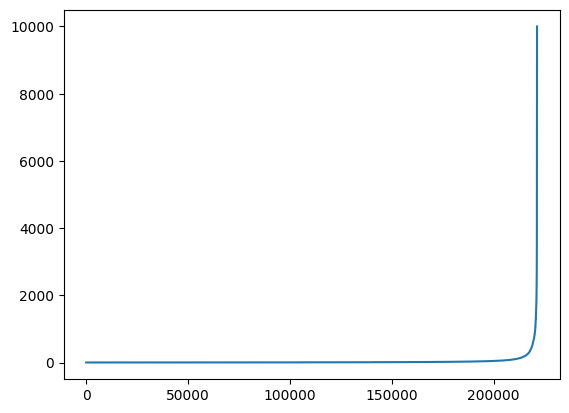

In [311]:
import matplotlib.pyplot as plt

plt.plot(total_review_num)
plt.show()

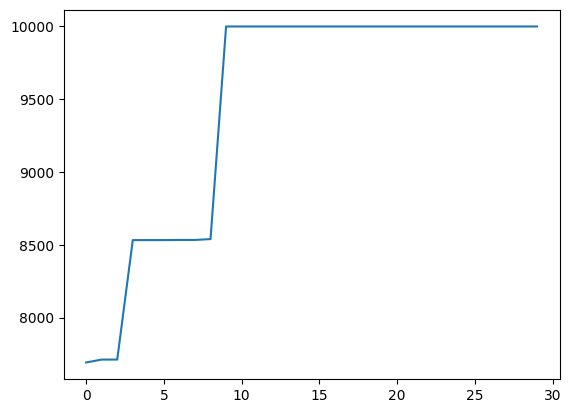

In [328]:
import matplotlib.pyplot as plt

plt.plot(total_review_num[-30:])
plt.show()

# category 점수 추가

### scaling 통해 category 점수 표준화
### 리뷰 수 기반으로 표준화된 신뢰도 점수 생성

In [267]:
review_num = 0
for folder in validation_list:
    if folder[0]!='.':
        file_list = os.listdir(os.path.join('/home/proj01/MA/rev5/Test',folder))
        #file 목록
        for file in file_list:
            if file[-4:] =='json':
                with open(os.path.join('/home/proj01/MA/rev5/Test',folder,file)) as f:
                    data = json.load(f)
                del data['genre']['NAN']
                data['review_num'] = sum(data['genre'].values())
                if data['review_num'] != 0:
                    for key in data['genre'].keys():
                        data['genre'][key] /= data['review_num']
                    
                    
                if not os.path.exists(os.path.join('/home/proj01/MA/rev5/Test',folder)):
                    os.makedirs(os.path.join('/home/proj01/MA/rev5/Test',folder))
                with open(os.path.join('/home/proj01/MA/rev5/Test',folder,file),'w') as file:
                    json.dump(data,file)

# 데이터 생성

In [286]:
movie_trans = {'confidential assignment':'공조',
 'assassination':'암살',
 'the spy gone north':'공작',
 'the outlaws':'범죄도시',
 'intimate stranger':'완벽한 타인',
 '1987':'1987',
 'a taxi driver':'택시운전사'}

In [287]:
movie_trans

{'confidential assignment': '공조',
 'assassination': '암살',
 'the spy gone north': '공작',
 'the outlaws': '범죄도시',
 'intimate stranger': '완벽한 타인',
 '1987': '1987',
 'a taxi driver': '택시운전사'}

In [306]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [367]:
movie_review_num.keys()

dict_keys(['confidential assignment', 'assassination', 'the spy gone north', 'the outlaws', 'intimate stranger', '1987', 'a taxi driver'])

In [389]:
# definition 1

for folder in validation_list:
    filters = pd.DataFrame(columns=['rating','sentiment','correlation','review','category','reviewNum','standard deviation'])
    if folder[0]!='.':
        scaler = RobustScaler()
        scaler.fit(np.array(movie_review_num[folder]).reshape(-1,1))
        file_list = os.listdir(os.path.join('/home/proj01/MA/rev5/Test',folder))
        #file 목록
        for file in file_list:
            if file[-4:] =='json':
                with open(os.path.join('/home/proj01/MA/rev5/Test',folder,file)) as f:
                    data = json.load(f)
            if len(data['data'])>=3:
                for movie in data['data']:
                    if movie['title'] == movie_trans[folder] and len(movie['review'])<=140:
                        temp = []
                        for i in movie['genre']:
                            temp.append(data['genre'][i])
                        df_temp =[float(movie['rating']),movie['sentiment score']/100,abs(float(movie['rating'])/10-movie['sentiment score']/100),movie['review'],np.average(temp),scaler.transform([[data['review_num']]])[0][0],data['standard deviation']]
                        filters.loc[len(filters)] = df_temp
    filters = filters.sort_values('standard deviation').reset_index(drop=True).drop('standard deviation',axis =1)
    untrust = filters.iloc[:int(len(filters)*0.3)]
    trust = filters.iloc[-int(len(filters)*0.3):]
    
    if not os.path.exists(os.path.join('/home/proj01/MA/rev5/EXP',folder)):
        os.makedirs(os.path.join('/home/proj01/MA/rev5/EXP',folder))
    trust.to_csv(os.path.join('/home/proj01/MA/rev5/EXP',folder,'definition1_trust.txt'),index=False,header=False)
    untrust.to_csv(os.path.join('/home/proj01/MA/rev5/EXP',folder,'definition1_untrust.txt'),index=False,header=False)

In [390]:
# definition 2

for folder in validation_list:
    filters = pd.DataFrame(columns=['rating','sentiment','correlation','review','category','reviewNum','sentiment sd'])
    
    if folder[0]!='.':
        scaler = RobustScaler()
        scaler.fit(np.array(movie_review_num[folder]).reshape(-1,1))
        file_list = os.listdir(os.path.join('/home/proj01/MA/rev5/Test',folder))
        #file 목록
        for file in file_list:
            if file[-4:] =='json':
                with open(os.path.join('/home/proj01/MA/rev5/Test',folder,file)) as f:
                    data = json.load(f)
            if len(data['data'])>=3:
                sent_temp=[]
                for movie in data['data']:
                    sent_temp.append(movie['sentiment score'])
                for movie in data['data']:
                    if movie['title'] == movie_trans[folder] and len(movie['review'])<=140:
                        temp = []
                        for i in movie['genre']:
                            temp.append(data['genre'][i])
                        df_temp =[float(movie['rating']),movie['sentiment score']/100,abs(float(movie['rating'])/10-movie['sentiment score']/100),movie['review'],np.average(temp),scaler.transform([[data['review_num']]])[0][0],np.std(sent_temp)]
                        filters.loc[len(filters)] = df_temp
    filters = filters.sort_values('sentiment sd').reset_index(drop=True).drop('sentiment sd',axis =1)
    untrust = filters.iloc[:int(len(filters)*0.3)]
    trust = filters.iloc[-int(len(filters)*0.3):]
    
    if not os.path.exists(os.path.join('/home/proj01/MA/rev5/EXP',folder)):
        os.makedirs(os.path.join('/home/proj01/MA/rev5/EXP',folder))
    trust.to_csv(os.path.join('/home/proj01/MA/rev5/EXP',folder,'definition2_trust.txt'),index=False,header=False)
    untrust.to_csv(os.path.join('/home/proj01/MA/rev5/EXP',folder,'definition2_untrust.txt'),index=False,header=False)

In [ ]:
# definition 3

for folder in validation_list:
    filters = pd.DataFrame(columns=['rating','sentiment','correlation','review','category','reviewNum','correlation score'])
    
    if folder[0]!='.':
        scaler = RobustScaler()
        scaler.fit(np.array(movie_review_num[folder]).reshape(-1,1))
        file_list = os.listdir(os.path.join('/home/proj01/MA/rev5/Test',folder))
        #file 목록
        for file in file_list:
            if file[-4:] =='json':
                with open(os.path.join('/home/proj01/MA/rev5/Test',folder,file)) as f:
                    data = json.load(f)
            if len(data['data'])>=3:
                sent_temp=[]
                rating_temp=[]
                for movie in data['data']:
                    sent_temp.append(movie['sentiment score'])
                    rating_temp.append(float(movie['rating']))
                corr_matrix = np.corrcoef(sent_temp,rating_temp)
                corr_score = corr_matrix[0,1]
                for movie in data['data']:
                    if movie['title'] == movie_trans[folder] and len(movie['review'])<=140:
                        temp = []
                        for i in movie['genre']:
                            temp.append(data['genre'][i])
                        df_temp =[float(movie['rating']),movie['sentiment score']/100,abs(float(movie['rating'])/10-movie['sentiment score']/100),movie['review'],np.average(temp),scaler.transform([[data['review_num']]])[0][0],corr_score]
                        filters.loc[len(filters)] = df_temp
    filters = filters.sort_values('correlation score').reset_index(drop=True).drop('correlation score',axis =1)
    untrust = filters.iloc[:int(len(filters)*0.3)]
    trust = filters.iloc[-int(len(filters)*0.3):]
    
    if not os.path.exists(os.path.join('/home/proj01/MA/rev5/EXP',folder)):
        os.makedirs(os.path.join('/home/proj01/MA/rev5/EXP',folder))
    trust.to_csv(os.path.join('/home/proj01/MA/rev5/EXP',folder,'definition3_trust.txt'),index=False,header=False)
    untrust.to_csv(os.path.join('/home/proj01/MA/rev5/EXP',folder,'definition3_untrust.txt'),index=False,header=False)

# 평점 재구성

In [549]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [556]:
def sum_scale(data):
    # 데이터의 총합 계산
    sum_val = np.sum(data)
    # Sum Scaling 수행
    scaled_data = data / sum_val
    return scaled_data

confidential assignment
definition3_trust.txt
mean_c :  8.525748015469164


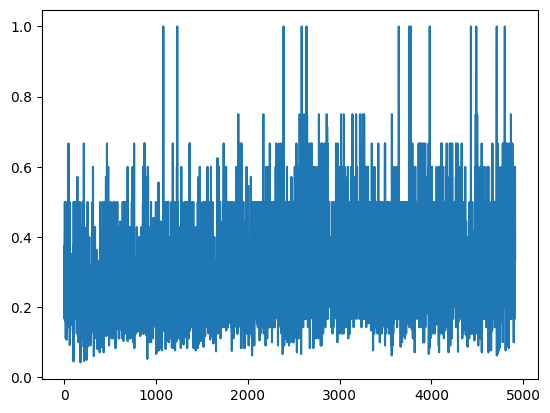

mean_g :  8.612383796534434
mean_n :  7.969785664899747
mean_total :  8.29108473071709
definition2_trust.txt
mean_c :  7.637085283940566


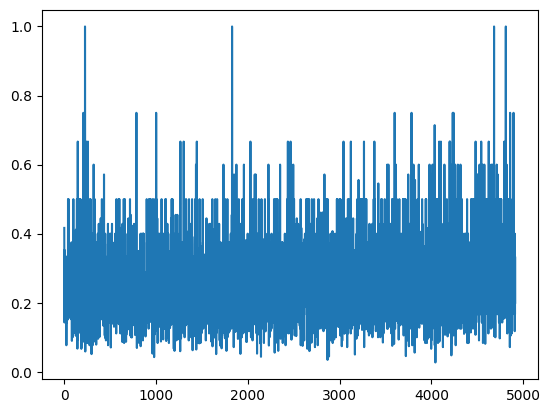

mean_g :  7.766741628678659
mean_n :  6.890747510439083
mean_total :  7.3287445695588715
definition1_trust.txt
mean_c :  6.485446773865255


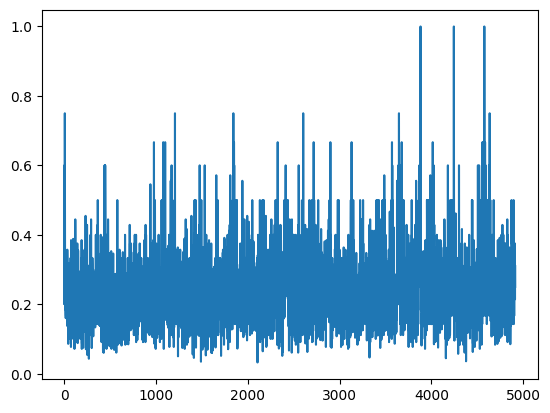

mean_g :  6.58119201626114
mean_n :  5.45032465947371
mean_total :  6.015758337867425
assassination
definition3_trust.txt
mean_c :  9.327054573603405


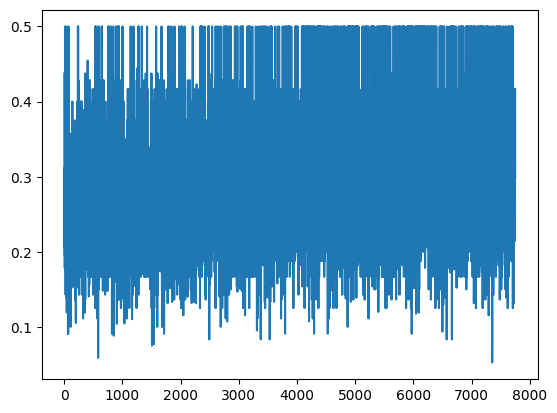

mean_g :  9.339358074289347
mean_n :  9.004333273148983
mean_total :  9.171845673719165
definition2_trust.txt
mean_c :  8.724293639530384


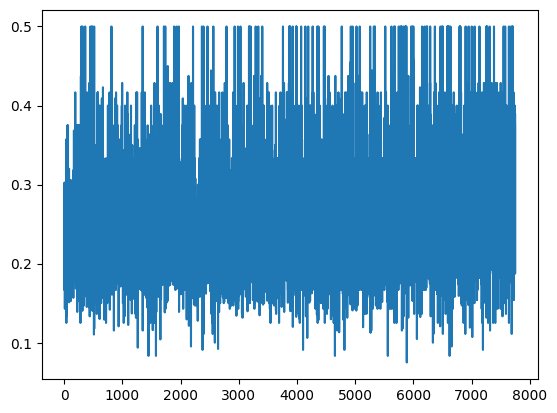

mean_g :  8.747093004918208
mean_n :  8.174856860154332
mean_total :  8.46097493253627
definition1_trust.txt
mean_c :  8.203199587150046


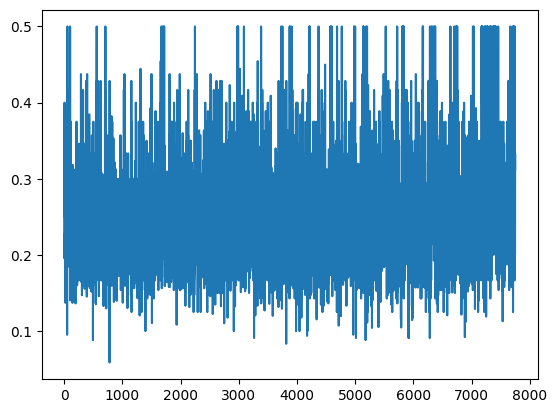

mean_g :  8.245788740770966
mean_n :  7.4040353131903665
mean_total :  7.824912026980666
the spy gone north
definition3_trust.txt
mean_c :  6.8618448637316565


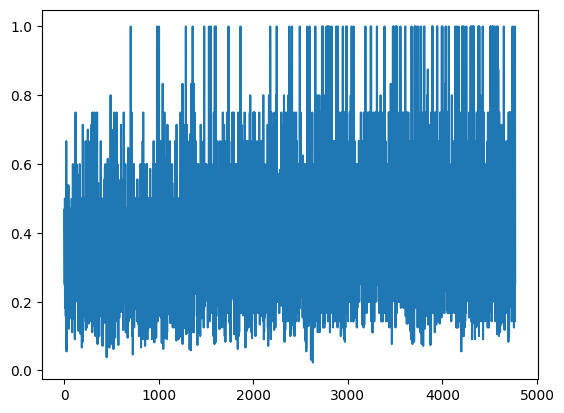

mean_g :  6.851017465516358
mean_n :  7.0779257954420345
mean_total :  6.964471630479196
definition2_trust.txt
mean_c :  6.284276729559749


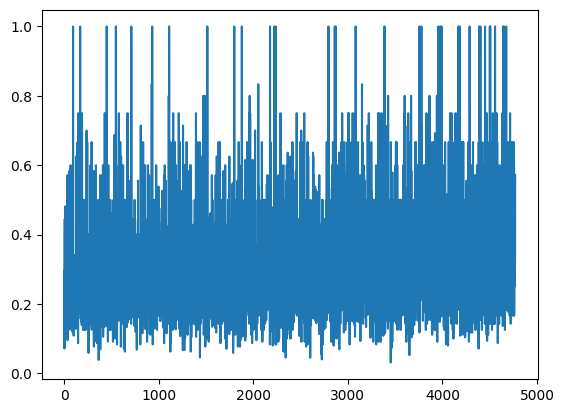

mean_g :  6.187679941477698
mean_n :  6.553604538982674
mean_total :  6.370642240230186
definition1_trust.txt
mean_c :  4.675471698113207


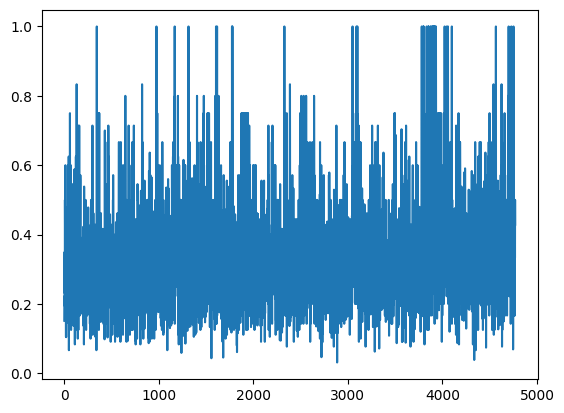

mean_g :  4.5550410282409715
mean_n :  5.22841021789576
mean_total :  4.891725623068366
the outlaws
definition3_trust.txt
mean_c :  9.40576675257732


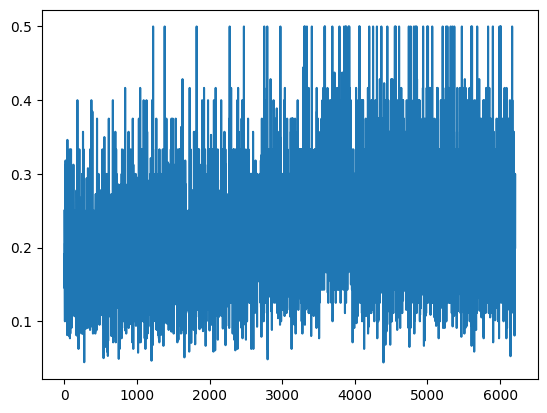

mean_g :  9.437614690729
mean_n :  9.17881436769926
mean_total :  9.30821452921413
definition2_trust.txt
mean_c :  8.991623711340207


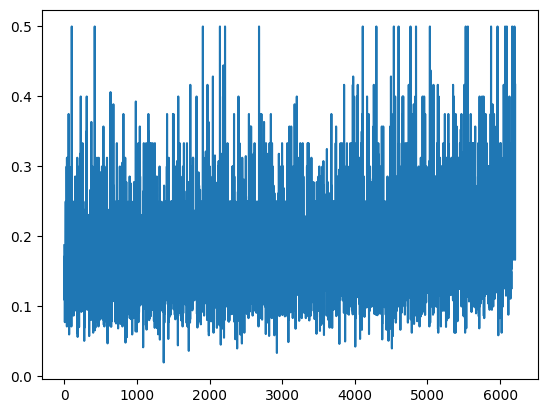

mean_g :  9.066204787691413
mean_n :  8.499076925986246
mean_total :  8.78264085683883
definition1_trust.txt
mean_c :  8.700225515463918


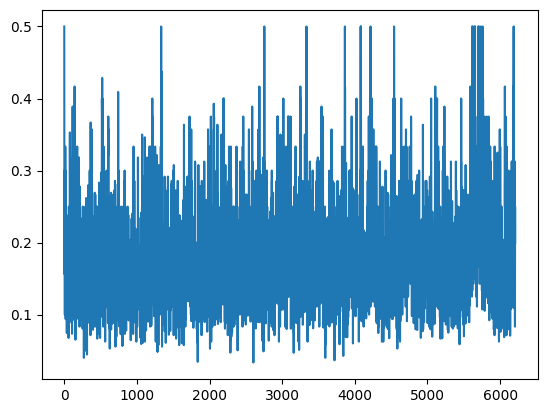

mean_g :  8.79790987934322
mean_n :  8.27530669815653
mean_total :  8.536608288749875
intimate stranger
definition3_trust.txt
mean_c :  8.728469674077271


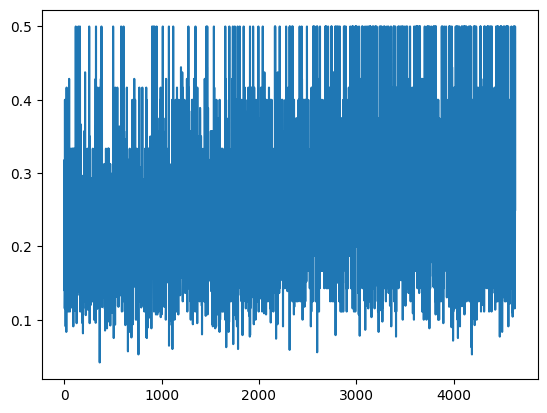

mean_g :  8.729107855881288
mean_n :  8.398526531339034
mean_total :  8.563817193610161
definition2_trust.txt
mean_c :  8.206129937405569


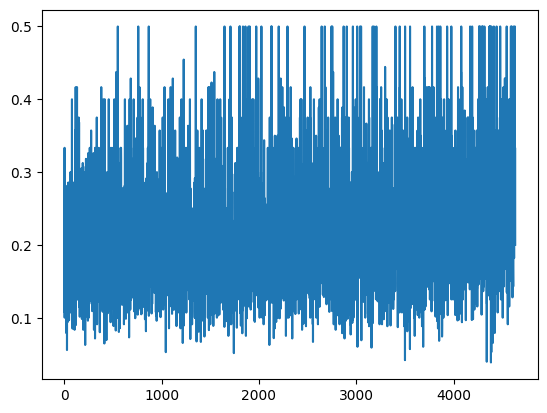

mean_g :  8.185340991293907
mean_n :  7.887238274302914
mean_total :  8.036289632798411
definition1_trust.txt
mean_c :  7.607165983164257


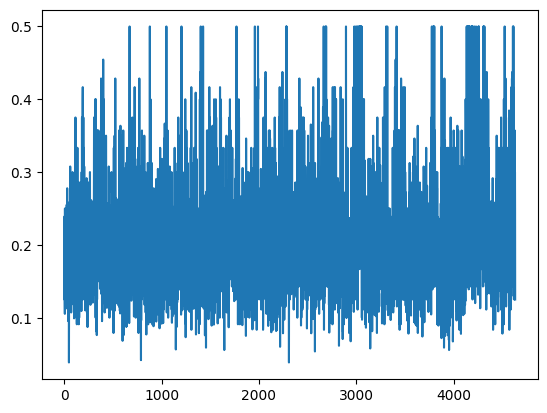

mean_g :  7.57806729250891
mean_n :  7.124422382012629
mean_total :  7.3512448372607695
1987
definition3_trust.txt
mean_c :  9.457220011370097


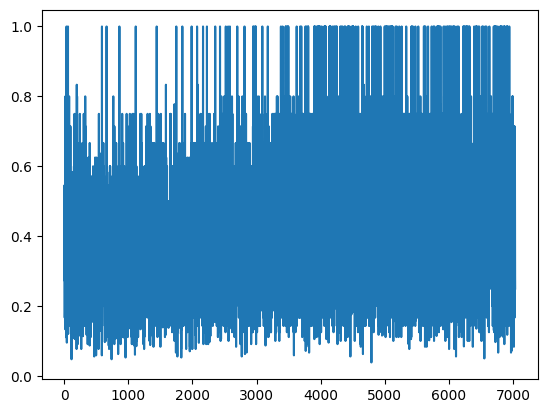

mean_g :  9.476201551316882
mean_n :  9.024860845725678
mean_total :  9.25053119852128
definition2_trust.txt
mean_c :  8.998720864127344


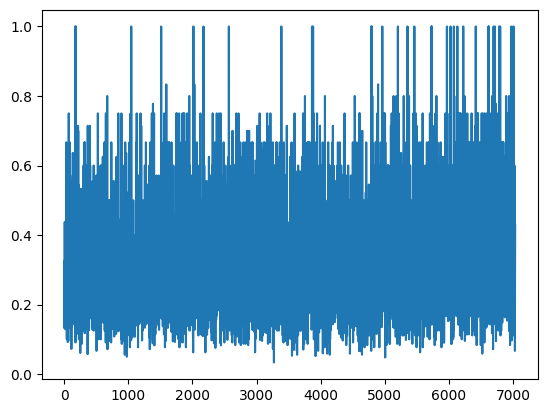

mean_g :  9.01435324979142
mean_n :  8.386150774666028
mean_total :  8.700252012228724
definition1_trust.txt
mean_c :  8.321489482660603


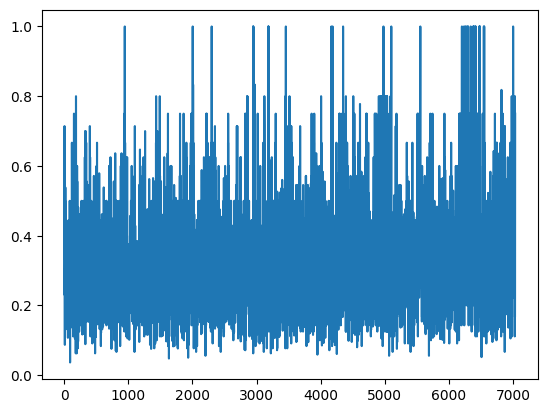

mean_g :  8.329120538657621
mean_n :  7.318065365255744
mean_total :  7.823592951956682
a taxi driver
definition3_trust.txt
mean_c :  9.361142160349559


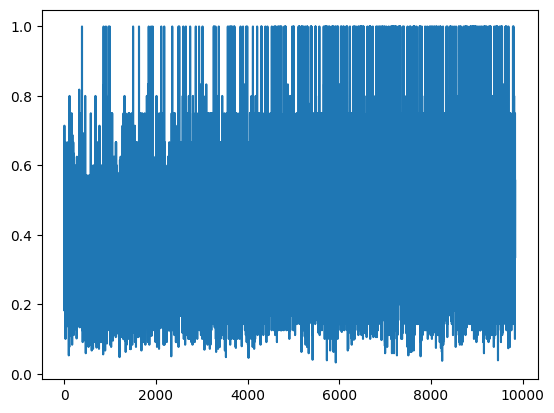

mean_g :  9.36679505984303
mean_n :  9.15296905587801
mean_total :  9.25988205786052
definition2_trust.txt
mean_c :  8.559495986180266


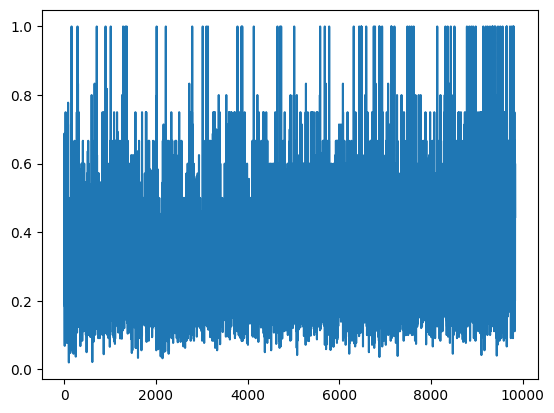

mean_g :  8.567765343785924
mean_n :  7.732733785226968
mean_total :  8.150249564506446
definition1_trust.txt
mean_c :  7.805812417437252


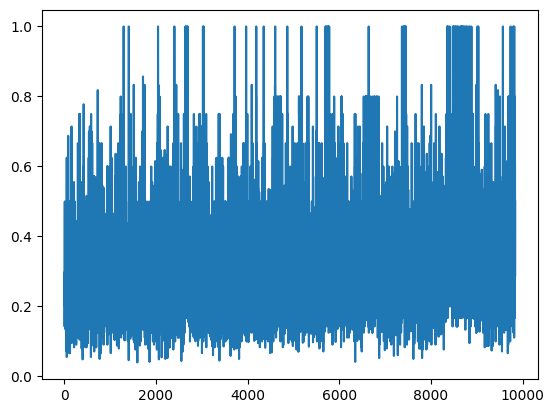

mean_g :  7.834270013779124
mean_n :  6.552091567852437
mean_total :  7.193180790815781


In [579]:
for folder in validation_list:
    if folder[0]!='.':
        print(folder)
        file_list = os.listdir(os.path.join('/home/proj01/MA/rev5/EXP',folder))
        #file 목록
        for file in file_list:
            if file[-10:] =='_trust.txt':
                print(file)
                with open(os.path.join('/home/proj01/MA/rev5/EXP',folder,file)) as f:
                    data = f.readlines()
                data_c = np.array([ line.strip().split(',')[:1]  for line in data],dtype=np.float64)
                print("mean_c : ",np.mean(data_c))
                
                
                scaler=MinMaxScaler()
                data_e = np.array([ [float(line.strip().split(',')[-2])] + [float(line.strip().split(',')[-1])] for line in data],dtype=np.float64)
                
                plt.plot(data_e[:,0])
                plt.show()
                
                
                #w = scaler.fit_transform(data_e[:,0].reshape(-1,1))
                w  = sum_scale(data_e[:,0]).reshape(-1,1)
                print("mean_g : ",np.sum(data_c*w) )
                mean_g = np.sum(data_c*w) 
                
                w  = sum_scale(data_e[:,1]).reshape(-1,1)
                print("mean_n : ",np.sum(data_c*w) )
                
                print("mean_total : ",np.mean([mean_g,np.sum(data_c*w)]))
                
                
                #data_e = data_c*data_e
#ㅕㅜ                #print("mean_e : ",np.mean(data_e,axis=0))

In [588]:
# untrust rating

for folder in validation_list:
    if folder[0]!='.':
        print(folder)
        file_list = os.listdir(os.path.join('/home/proj01/MA/rev5/EXP',folder))
        #file 목록
        temp =[]
        for file in file_list:
            if file[-10:] =='ntrust.txt':
                print(file)
                with open(os.path.join('/home/proj01/MA/rev5/EXP',folder,file)) as f:
                    data = f.readlines()
                data_c = np.array([ line.strip().split(',')[:1]  for line in data],dtype=np.float64)
                #print("mean_c : ",np.mean(data_c))
                temp.append(data_c)
        print(np.mean(temp))
                #data_e = data_c*data_e
                #print("mean_e : ",np.mean(data_e,axis=0))

confidential assignment
definition2_untrust.txt
definition3_untrust.txt
definition1_untrust.txt
8.792116154420246
assassination
definition2_untrust.txt
definition3_untrust.txt
definition1_untrust.txt
9.241689244398572
the spy gone north
definition2_untrust.txt
definition3_untrust.txt
definition1_untrust.txt
7.818378756114605
the outlaws
definition2_untrust.txt
definition3_untrust.txt
definition1_untrust.txt
9.320393041237113
intimate stranger
definition2_untrust.txt
definition3_untrust.txt
definition1_untrust.txt
8.971292898769695
1987
definition2_untrust.txt
definition3_untrust.txt
definition1_untrust.txt
9.392078832670078
a taxi driver
definition2_untrust.txt
definition3_untrust.txt
definition1_untrust.txt
9.279375402228771
